In [89]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix


from sklearn import metrics


warnings.filterwarnings("ignore")

sns.set()


In [87]:
!pip install session_info

  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8053 sha256=5fc7b8e8c4c286f5289ae2c59c14f58575fdbaf51adfec6ed6df1be06d687f66
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\5c\1b\4d\111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [90]:
import session_info
session_info.show()

import dataset(train and test)

In [2]:
diabetes_df_train1 = pd.read_csv('Downloads\diabetes_v2\diabetes_train_analysis.csv')
diabetes_df_train1.head()


,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,62538,low,low,0,0,1,100/80,0
1,49159,low,low,0,0,1,120/82,0
2,60683,low,low,0,0,1,120/80,0
3,42924,low,low,0,0,0,120\80,0
4,52888,low,low,0,0,0,120/80,0


In [3]:
diabetes_df_test1 = pd.read_csv('Downloads\diabetes_v2\diabetes_test_analysis.csv')
diabetes_df_test1.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,95306,low,medium,0,0,0,120/80,1
1,86688,low,low,0,0,1,100\70,0
2,98038,low,low,0,0,0,140/100,1
3,88694,low,low,0,0,1,120\90,0
4,92856,low,low,0,0,0,130\80,0


In [4]:
diabetes_df_train2 = pd.read_csv('Downloads\diabetes_v2\diabetes_train_info.csv')
diabetes_df_train2.head()

,id,age,height,weight,gender
0,0,50,168,62.0,f
1,1,55,156,85.0,m
2,2,18857,165,64.0,male
3,3,17623,169,82.0,f
4,4,47,156,56.0,m


In [5]:
diabetes_df_test2 = pd.read_csv('Downloads\diabetes_v2\diabetes_test_info.csv')
diabetes_df_test2.head()

,id,age,height,weight,gender
0,85656,19149,165,62.0,m
1,85658,14453,159,67.0,m
2,85659,15877,168,59.0,m
3,85660,21228,167,70.0,female
4,85661,54,163,82.0,f


merge the data info and analysis (for both train and test)

In [6]:
merged_data = diabetes_df_train1.merge(diabetes_df_train2,on=["id"])

In [7]:
merged_data_test = diabetes_df_test1.merge(diabetes_df_test2,on=["id"])

In [8]:
merged_data = merged_data.drop('id', axis=1)
merged_data.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,low,0,0,1,100/80,0,54,169,76.0,f
1,low,low,0,0,1,120/82,0,49,165,65.0,m
2,low,low,0,0,1,120/80,0,21962,170,56.0,m
3,low,low,0,0,0,120\80,0,20287,169,62.0,m
4,low,low,0,0,0,120/80,0,16202,166,67.0,male


In [9]:
merged_data_test = merged_data_test.drop('id', axis=1)

merged_data_test.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,medium,0,0,0,120/80,1,61,165,90.0,f
1,low,low,0,0,1,100\70,0,14582,162,50.0,m
2,low,low,0,0,0,140/100,1,23389,156,74.0,m
3,low,low,0,0,1,120\90,0,47,162,89.0,m
4,low,low,0,0,0,130\80,0,18388,162,72.0,f


count the values to find missing values

In [10]:
merged_data.count()

cholesterol    60000
gluc           60000
smoke          60000
alco           60000
active         60000
pressure       60000
diabetes       60000
age            60000
height         60000
weight         58002
gender         60000
dtype: int64

weight have some missing value which cannot be filled manually so we need to drop the column

In [11]:
merged_data_test.count()

cholesterol    10000
gluc           10000
smoke          10000
alco           10000
active         10000
pressure       10000
diabetes       10000
age            10000
height         10000
weight          9680
gender         10000
dtype: int64

#Info about the dataset

In [12]:
merged_data.columns

Index(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'pressure',
       'diabetes', 'age', 'height', 'weight', 'gender'],
      dtype='object')

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cholesterol  60000 non-null  object 
 1   gluc         60000 non-null  object 
 2   smoke        60000 non-null  int64  
 3   alco         60000 non-null  int64  
 4   active       60000 non-null  int64  
 5   pressure     60000 non-null  object 
 6   diabetes     60000 non-null  int64  
 7   age          60000 non-null  int64  
 8   height       60000 non-null  int64  
 9   weight       58002 non-null  float64
 10  gender       60000 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.5+ MB


In [14]:
merged_data.describe()

,smoke,alco,active,diabetes,age,height,weight
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,58002.000000
mean,0.087733,0.053167,0.804200,0.249300,13662.133367,164.348450,74.186134
std,0.282909,0.224368,0.396819,0.432611,9130.429102,8.198147,14.609311
min,0.000000,0.000000,0.000000,0.000000,30.000000,55.000000,10.000000
25%,0.000000,0.000000,1.000000,0.000000,60.000000,159.000000,65.000000
50%,0.000000,0.000000,1.000000,0.000000,18174.000000,165.000000,71.000000
75%,0.000000,0.000000,1.000000,0.000000,20579.000000,170.000000,82.000000
max,1.000000,1.000000,1.000000,1.000000,23713.000000,250.000000,200.000000


In [15]:
merged_data.isnull()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
59995,False,False,False,False,False,False,False,False,False,False,False
59996,False,False,False,False,False,False,False,False,False,False,False
59997,False,False,False,False,False,False,False,False,False,False,False
59998,False,False,False,False,False,False,False,False,False,False,False


In [16]:
merged_data.isnull().sum()

cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
diabetes          0
age               0
height            0
weight         1998
gender            0
dtype: int64

In [17]:
merged_data_test.isnull().sum()

cholesterol      0
gluc             0
smoke            0
alco             0
active           0
pressure         0
diabetes         0
age              0
height           0
weight         320
gender           0
dtype: int64

In [18]:
df = merged_data.dropna()

In [19]:
df_t = merged_data_test.dropna()

In [20]:
df_t

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,medium,0,0,0,120/80,1,61,165,90.0,f
1,low,low,0,0,1,100\70,0,14582,162,50.0,m
2,low,low,0,0,0,140/100,1,23389,156,74.0,m
3,low,low,0,0,1,120\90,0,47,162,89.0,m
4,low,low,0,0,0,130\80,0,18388,162,72.0,f
...,...,...,...,...,...,...,...,...,...,...,...
9995,low,low,0,0,0,120/80,0,18984,168,78.0,m
9996,medium,low,0,0,1,120/80,0,52,160,79.0,m
9997,low,low,1,1,1,130/80,0,55,189,72.0,female
9998,low,low,0,0,1,120\80,0,52,159,65.0,m


column "gender" have more than one type of values so we need to replace those and change them into categorical value
1 = male
2 = female

In [21]:
df['gender'].value_counts()

m         26397
f         14206
male      11525
female     5874
Name: gender, dtype: int64

In [22]:
df['gender'] = df['gender'].replace(['male', 'female'], ['m', 'f'])


In [23]:
df_t['gender'] = df_t['gender'].replace(['male', 'female'], ['m', 'f'])


In [24]:
df['gender'] = df['gender'].replace(['m', 'f'], ['1', '2'])


In [25]:
df_t['gender'] = df_t['gender'].replace(['m', 'f'], ['1', '2'])


In [26]:
df_t

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,medium,0,0,0,120/80,1,61,165,90.0,2
1,low,low,0,0,1,100\70,0,14582,162,50.0,1
2,low,low,0,0,0,140/100,1,23389,156,74.0,1
3,low,low,0,0,1,120\90,0,47,162,89.0,1
4,low,low,0,0,0,130\80,0,18388,162,72.0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,low,low,0,0,0,120/80,0,18984,168,78.0,1
9996,medium,low,0,0,1,120/80,0,52,160,79.0,1
9997,low,low,1,1,1,130/80,0,55,189,72.0,2
9998,low,low,0,0,1,120\80,0,52,159,65.0,1


In [27]:
df['gender'] = df['gender'].astype(int)
df_t['gender'] = df_t['gender'].astype(int)


in train and test dataset value of age has invalid data to we have to remove that colun as it will affect the accuracy

In [28]:
df = df.drop('age', axis=1)

In [29]:
df_t = df_t.drop('age', axis=1)

## Converting string into categorical data

In [30]:
x = {'low':'0', 'medium':'1', 'high':'2'}
df['cholesterol'] = df['cholesterol'].map(x)

In [31]:
df_t['cholesterol'] = df_t['cholesterol'].map(x)

In [32]:
df['gluc'] = df['gluc'].map(x)

In [33]:
df_t['gluc'] = df_t['gluc'].map(x)

In [34]:
df['gluc'] = df['gluc'].astype(int)

In [35]:
df_t['gluc'] = df_t['gluc'].astype(int)

In [36]:
df

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,height,weight,gender
0,0,0,0,0,1,100/80,0,169,76.0,2
1,0,0,0,0,1,120/82,0,165,65.0,1
2,0,0,0,0,1,120/80,0,170,56.0,1
3,0,0,0,0,0,120\80,0,169,62.0,1
4,0,0,0,0,0,120/80,0,166,67.0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,1,130\80,0,178,103.0,2
59996,0,0,0,0,1,130\90,0,160,82.0,1
59997,0,0,1,0,1,110/70,0,158,60.0,1
59998,1,0,1,0,1,152/90,1,175,85.0,2


pressure has two type of values "80/120"and"80\120"
#First we need to make it same and then divide it into two different column

In [37]:
df2=df.replace(regex=[r'\\'],value='/')

In [38]:
df2_t=df_t.replace(regex=[r'\\'],value='/')

In [39]:
df2_t

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,height,weight,gender
0,0,1,0,0,0,120/80,1,165,90.0,2
1,0,0,0,0,1,100/70,0,162,50.0,1
2,0,0,0,0,0,140/100,1,156,74.0,1
3,0,0,0,0,1,120/90,0,162,89.0,1
4,0,0,0,0,0,130/80,0,162,72.0,2
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,120/80,0,168,78.0,1
9996,1,0,0,0,1,120/80,0,160,79.0,1
9997,0,0,1,1,1,130/80,0,189,72.0,2
9998,0,0,0,0,1,120/80,0,159,65.0,1


In [40]:
print(repr(df.pressure[3]))

'120\\80'


In [41]:
df1 =df2['pressure'].str.split('/',expand =True)

In [42]:
df1_t =df2_t['pressure'].str.split('/',expand =True)

In [43]:
df1_t

,0,1
0,120,80
1,100,70
2,140,100
3,120,90
4,130,80
...,...,...
9995,120,80
9996,120,80
9997,130,80
9998,120,80


In [44]:
df2["systolic"]= df1[0]
 
# making separate last name column from new data frame
df2["diastolic"]= df1[1]

In [45]:
df2_t["systolic"]= df1_t[0]
 
# making separate last name column from new data frame
df2_t["diastolic"]= df1_t[1]

In [46]:
df2_t

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,height,weight,gender,systolic,diastolic
0,0,1,0,0,0,120/80,1,165,90.0,2,120,80
1,0,0,0,0,1,100/70,0,162,50.0,1,100,70
2,0,0,0,0,0,140/100,1,156,74.0,1,140,100
3,0,0,0,0,1,120/90,0,162,89.0,1,120,90
4,0,0,0,0,0,130/80,0,162,72.0,2,130,80
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,120/80,0,168,78.0,1,120,80
9996,1,0,0,0,1,120/80,0,160,79.0,1,120,80
9997,0,0,1,1,1,130/80,0,189,72.0,2,130,80
9998,0,0,0,0,1,120/80,0,159,65.0,1,120,80


Converting string into integer values

In [47]:
df2['systolic'] = df2['systolic'].astype(int)

In [48]:
df2_t['systolic'] = df2_t['systolic'].astype(int)

In [49]:
df2['diastolic'] = df2['diastolic'].astype(int)

In [50]:
df2_t['diastolic'] = df2_t['diastolic'].astype(int)

In [51]:
df2['cholesterol'] = df2['cholesterol'].astype(int)

In [52]:
df_t['cholesterol'] = df_t['cholesterol'].astype(int)

Drop the column pressure as it is sub divided into systolic and diastolic pressure

In [53]:
df = df2.drop('pressure', axis=1)

In [54]:
df_test = df2_t.drop('pressure', axis=1)

# Data Visualization

Plotting the data distribution plots

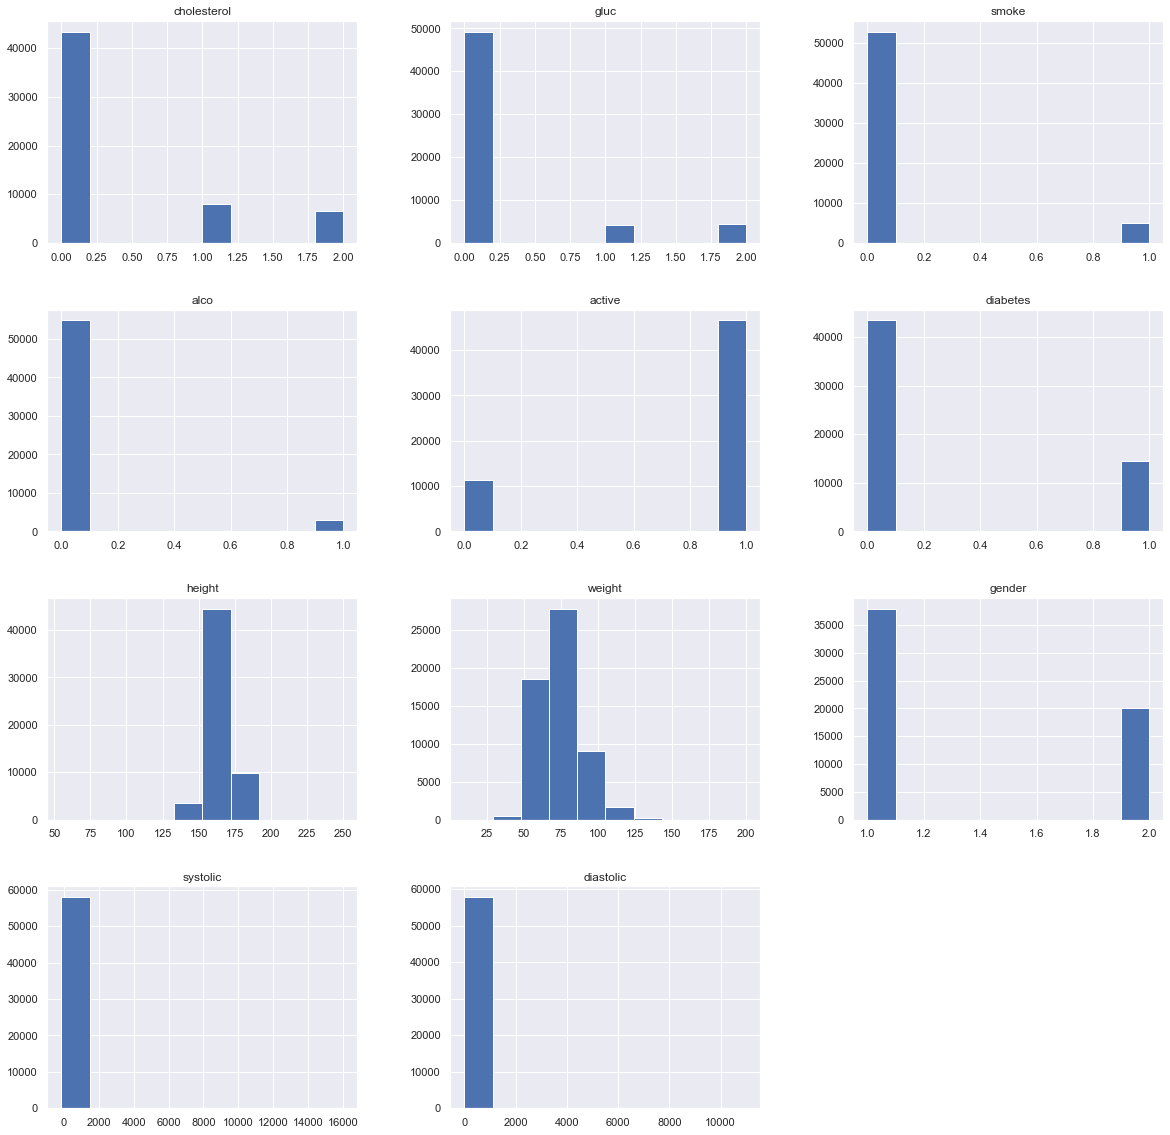

In [55]:
p = df.hist(figsize = (20,20))

let’s check that how well our outcome column is balanced

0    43486
1    14516
Name: diabetes, dtype: int64


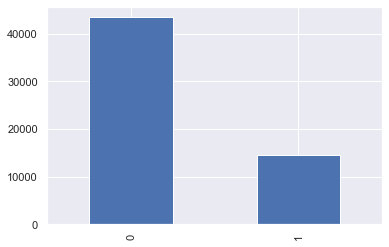

In [56]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(df.diabetes.value_counts())
p=df.diabetes.value_counts().plot(kind="bar")

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

## Correlation between all the features

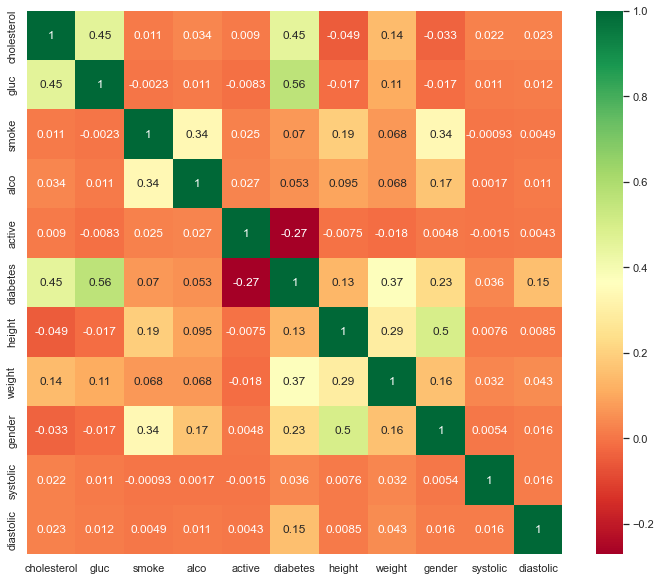

In [57]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [58]:
# function to visualize relationship:
def re(colnam1, colnam2):
    plt.figure(figsize=(16, 6))
    sns.regplot(x=df[colnam1], y=df[colnam2])
    sns.set_style("darkgrid")

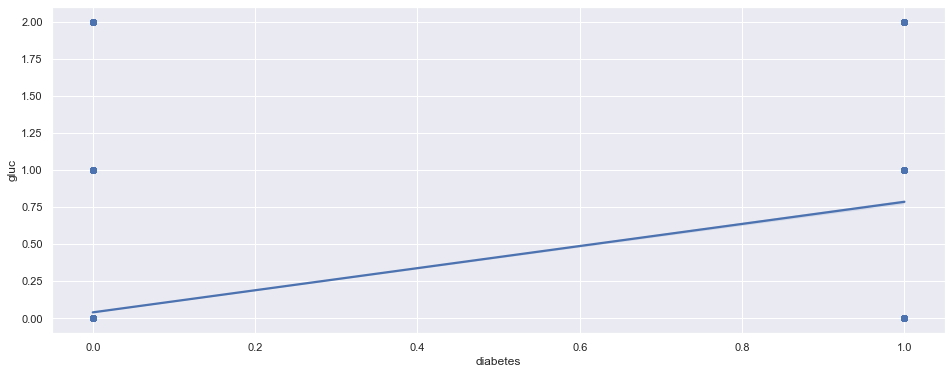

In [59]:
re("diabetes", "gluc")

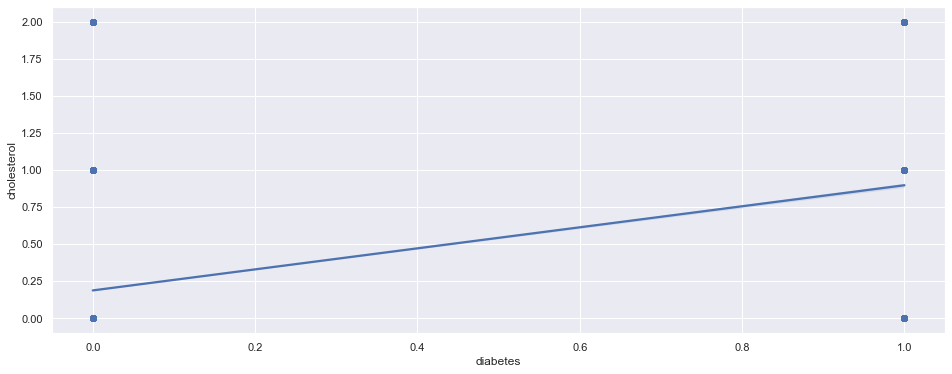

In [60]:
re("diabetes", "cholesterol")

# model building

Splitting the dataset(train and test)

In [61]:
X_train = df.drop('diabetes', axis=1)
y_train = df['diabetes']

In [62]:
X_test = df_test.drop('diabetes', axis=1)
y_test = df_test['diabetes']

## Random Forest

Building the model using RandomForest

In [63]:

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [64]:
rfc_train = rfc.predict(X_train)

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9910520326885279


Getting the accuracy score for Random Forest

In [65]:

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.927995867768595


In [66]:
#Classification report and confusion matrix of random forest model

In [67]:

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[6852  368]
 [ 329 2131]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7220
           1       0.85      0.87      0.86      2460

    accuracy                           0.93      9680
   macro avg       0.90      0.91      0.91      9680
weighted avg       0.93      0.93      0.93      9680



# Decision Tree

In [68]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:


predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.9148760330578513


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[6832  388]
 [ 436 2024]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7220
           1       0.84      0.82      0.83      2460

    accuracy                           0.91      9680
   macro avg       0.89      0.88      0.89      9680
weighted avg       0.91      0.91      0.91      9680



#  XgBoost classifier

In [71]:

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

[15:42:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.9370867768595041


In [73]:

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[6934  286]
 [ 323 2137]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7220
           1       0.88      0.87      0.88      2460

    accuracy                           0.94      9680
   macro avg       0.92      0.91      0.92      9680
weighted avg       0.94      0.94      0.94      9680



# Support Vector Machine (SVM)

In [74]:

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [75]:
svc_pred = svc_model.predict(X_test)

In [76]:

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8074380165289257


In [77]:

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[7162   58]
 [1806  654]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7220
           1       0.92      0.27      0.41      2460

    accuracy                           0.81      9680
   macro avg       0.86      0.63      0.65      9680
weighted avg       0.83      0.81      0.76      9680



Accuracy Comparison

In [78]:
print("Accuracy_Score of random forest =", format(metrics.accuracy_score(y_train, rfc_train)))
print("Accuracy Score svm =", format(metrics.accuracy_score(y_test, svc_pred)))
print("Accuracy Score xgboost =", format(metrics.accuracy_score(y_test, xgb_pred)))
print("Accuracy Score decision tree =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy_Score of random forest = 0.9910520326885279
Accuracy Score svm = 0.8074380165289257
Accuracy Score xgboost = 0.9370867768595041
Accuracy Score decision tree = 0.9148760330578513


# Feature Importance

In [79]:
rfc.feature_importances_

array([0.11786031, 0.26677864, 0.00600879, 0.0047694 , 0.09626079,
       0.09361449, 0.17775506, 0.06875025, 0.06334781, 0.10485445])

In [80]:
df

,cholesterol,gluc,smoke,alco,active,diabetes,height,weight,gender,systolic,diastolic
0,0,0,0,0,1,0,169,76.0,2,100,80
1,0,0,0,0,1,0,165,65.0,1,120,82
2,0,0,0,0,1,0,170,56.0,1,120,80
3,0,0,0,0,0,0,169,62.0,1,120,80
4,0,0,0,0,0,0,166,67.0,1,120,80
...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,1,0,178,103.0,2,130,80
59996,0,0,0,0,1,0,160,82.0,1,130,90
59997,0,0,1,0,1,0,158,60.0,1,110,70
59998,1,0,1,0,1,1,175,85.0,2,152,90


In [81]:
df_test

,cholesterol,gluc,smoke,alco,active,diabetes,height,weight,gender,systolic,diastolic
0,0,1,0,0,0,1,165,90.0,2,120,80
1,0,0,0,0,1,0,162,50.0,1,100,70
2,0,0,0,0,0,1,156,74.0,1,140,100
3,0,0,0,0,1,0,162,89.0,1,120,90
4,0,0,0,0,0,0,162,72.0,2,130,80
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,168,78.0,1,120,80
9996,1,0,0,0,1,0,160,79.0,1,120,80
9997,0,0,1,1,1,0,189,72.0,2,130,80
9998,0,0,0,0,1,0,159,65.0,1,120,80


<AxesSubplot:>

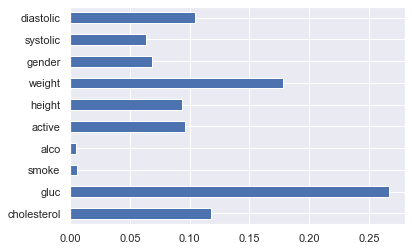

In [82]:
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))

# Saving Model – Random Forest and justify the result

In [83]:


# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
df.tail()

,cholesterol,gluc,smoke,alco,active,diabetes,height,weight,gender,systolic,diastolic
59995,0,0,0,0,1,0,178,103.0,2,130,80
59996,0,0,0,0,1,0,160,82.0,1,130,90
59997,0,0,1,0,1,0,158,60.0,1,110,70
59998,1,0,1,0,1,1,175,85.0,2,152,90
59999,0,0,0,0,1,0,169,71.0,1,110,60


In [85]:
#Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.
rfc.predict([[1,0,1,0,1,175,85.0,2,152,90]])

array([1], dtype=int64)

In [91]:
!pip install pipreqs
!pip install nbconvert

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=41da0cdc9e79c087ad8e1058e8cf24542c9a5039134b7998a63d1da58f0d5a29
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
